# Sensor Fusion. Assignment 2. Vsevolod Hulchuk. HYVBV0

In [5]:
from analysis.analysis import *
import cv2
import matplotlib
import json

Here are the parameters, methods and dataset for parameters ranges below <br/>
- **Gauss sigma factor** (gsf) is an adaptive parameter for spatial sigma - it adjusts sigma depending on the window size <br/>
- **Sigma range** (sr) is a range sigma <br/>
- **Window size** (w_size) is a size of the window <br/>
Note that for NCC and MSE_inverted, **occlusions are ignored**. <br/>
MSE_inverted is 1/MSE, scaled so that it can fit on the same axis with other metrics (see in `analysis/compare_disparities.py`) <br/>
Other summarizing logic can be found in `analysis/analysis.py` <br/>

The idea if that we take **disparity image DP**, grenerated from previous lab using DP, **groundtruth disparity**, **intensity**. Make them 2 times smaller so that algos run faster.<br/>
- For **upsampling filters**, we make **disparity image DP** 4 times smaller and try to upsample it back, then compare to the **groundtruth disparity**.<br/>
- For **non-upsampling filters**, we just apply them to **disparity image DP** and compare the result to the **groundtruth disparity**.<br/>

### TO RUN THE PROGRAM:
`cd data` <br/>
`chmod +x load_all_data.sh` <br/>
`./load_all_data.sh` <br/>
`cd ..` <br/>
`mkdir build` <br/>
`cd build` <br/>
`cmake ..` <br/>
`make` <br/>
`cd ..` <br/>
`./build/filters --help` <br/>
`./build/filters -H` <br/>

In [38]:
# comparison values (from analysis.py)
print(f"Datasets: \t\t{datasets}")
print(f"Metrics: \t\t{list(metrics_dict.keys())}")
print(f"Methods: \t\t{methods}")
print(f"Methods Upsample: \t{methods_upsample}")
params_print = json.dumps(dict({k: str(v) for k, v in params.items()}), indent=4)
print(f"params: {params_print}")
print(f"Default params: {json.dumps(default_params, indent=4)}")
full_names = {
    "w_sizes": "Window Size",
    "srs": "Sigma Range",
    "gsfs": "Gauss Sigma Factor"
}
print(json.dumps(full_names, indent=4))

Datasets: 		['Baby1', 'Cloth1', 'Art', 'Flowerpots', 'Reindeer', 'Midd1', 'Laundry', 'Bowling1', 'Aloe', 'Dolls', 'Moebius', 'Books']
Metrics: 		['SSIM', 'MSE_inverted', 'NCC']
Methods: 		['JB', 'Bilet']
Methods Upsample: 	['Iter', 'JBU']
params: {
    "w_sizes": "[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]",
    "srs": "[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]",
    "gsfs": "[0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9]"
}
Default params: {
    "w_sizes": 10,
    "gsfs": 1.5,
    "srs": 25
}
{
    "w_sizes": "Window Size",
    "srs": "Sigma Range",
    "gsfs": "Gauss Sigma Factor"
}


### Average performance of algorithms for parameters ranges

In [32]:
metrics_all = {}
for Algo in methods:
    metrics_all[Algo] = {}
    for param in params.keys():
        metrics_all[Algo][param] = get_avg_metrics(get_metrics_param_func(Algo, param))


#### For non-upsampling algorithms (Bileteral, JB)

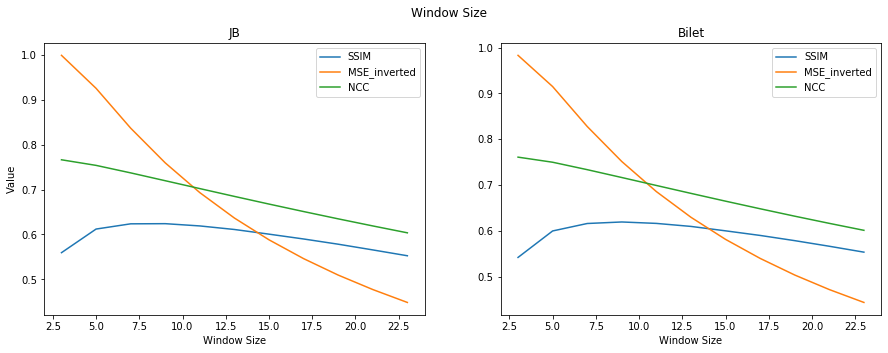

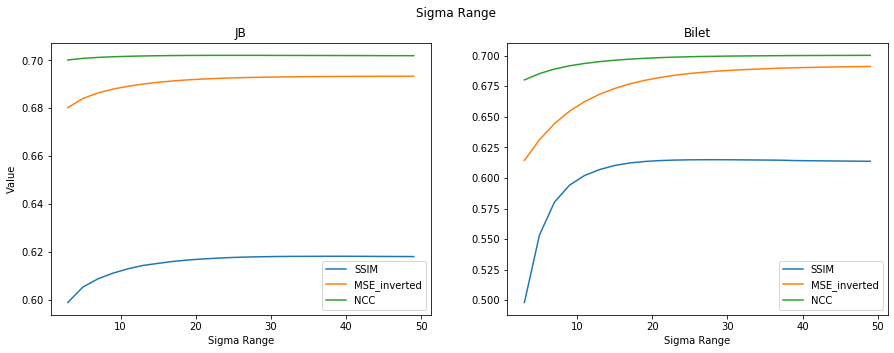

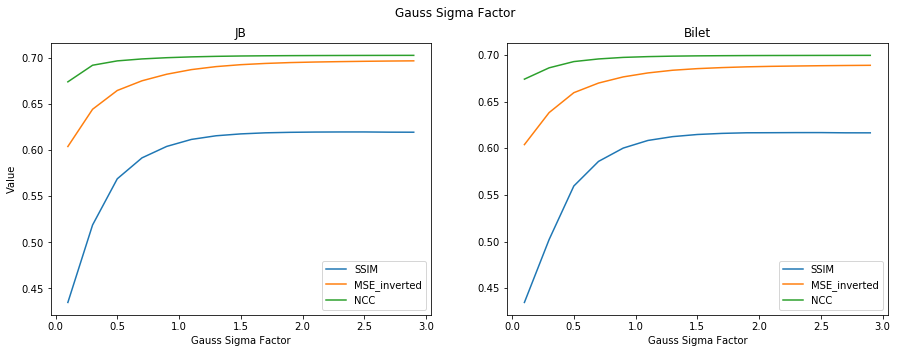

In [8]:

for param in params.keys():
    fig, axes = plt.subplots(nrows=1, ncols=len(methods), sharex=True, figsize=(15, 5))
    plt.suptitle(full_names[param])
    for metric in metrics_dict:
        for i, method in enumerate(methods):
            ax = axes[i] 
            cur = metrics_all[method][param][metric].copy()
            if metric == "MSE_inverted":
                cur /= 2
            cur.plot(ax=ax, label=metric)
            ax.set_xlabel(full_names[param])
            if i == 0:
                ax.set_ylabel("Value")
            ax.set_title(method)
            ax.legend()
    plt.plot()

- **Window size**: optimal is **8 for JB** and **15 for Billeteral** as ssim decreases afterwards. Other metrics keep decreasing all the time. <br/>
- **Sigma Range**: optimal is **25 for JB** and **20 for Billeteral** as all metrics stop increasing, although visually edges become less distinguashable <br/>
- **Gauss Sigma Factor**: optimal is **1.5 for JB and  Billeteral** as all metrics stop increasing, although visually disparity image becomes more blurry

In [39]:
metrics_all_upsample = {}
for Algo in methods_upsample:
    metrics_all_upsample[Algo] = {}
    for param in params.keys():
        metrics_all_upsample[Algo][param] = get_avg_metrics(get_metrics_param_func(Algo, param))

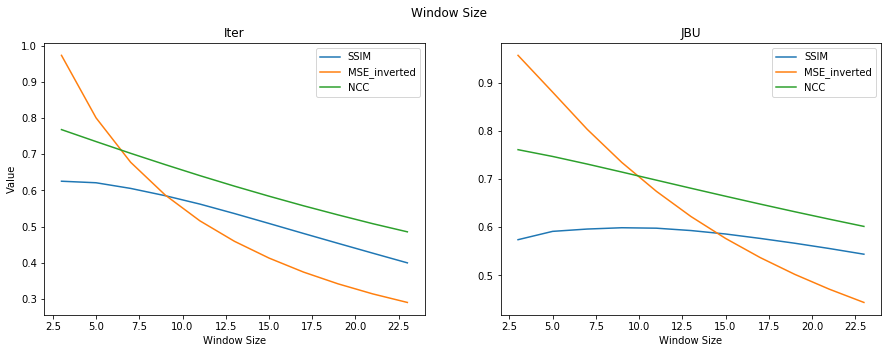

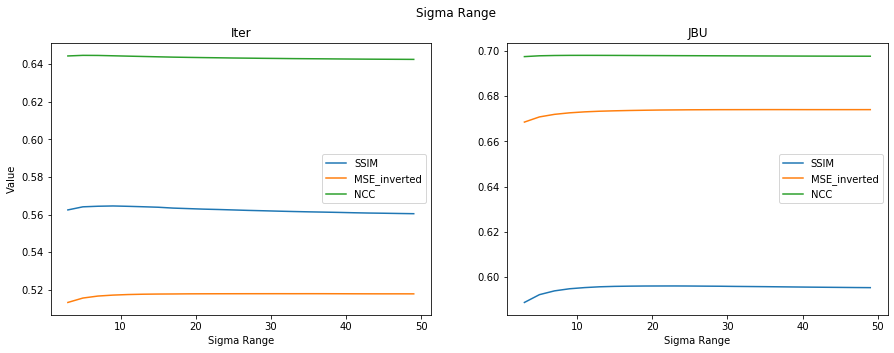

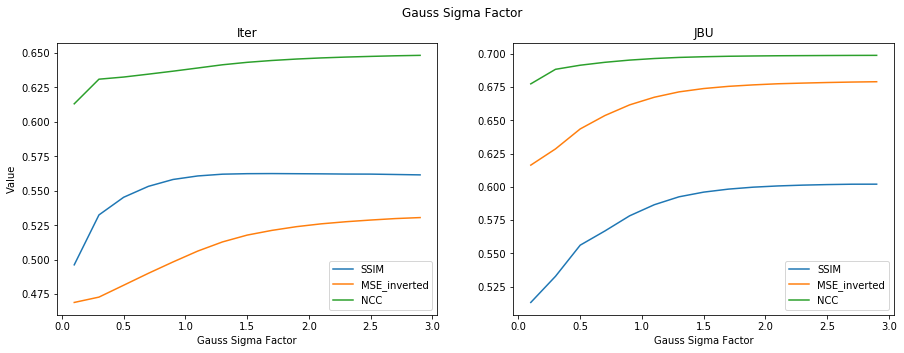

In [40]:

for param in params.keys():
    fig, axes = plt.subplots(nrows=1, ncols=len(methods), sharex=True, figsize=(15, 5))
    plt.suptitle(full_names[param])
    for metric in metrics_dict:
        for i, method in enumerate(methods_upsample):
            ax = axes[i] 
            cur = metrics_all_upsample[method][param][metric].copy()
            if metric == "MSE_inverted":
                cur /= 2
            cur.plot(ax=ax, label=metric)
            ax.set_xlabel(full_names[param])
            if i == 0:
                ax.set_ylabel("Value")
            ax.set_title(method)
            ax.legend()
    plt.plot()

- **Window size**: for **Iterative**, all the metrics are decreasing with the increase of window size, so **10 is picked** as a good point for possible further improvement of the algo. <br/>
- **Sigma Range**: optimal is **20-25 for JBU** and **10 for Iterative** for the same reasons as in the previous explonation about sigma range. <br/>
- **Gauss Sigma Factor**: optimal is **1.5 for JBU and  Iterative** for the same reasons as in the previous explonation about gsf.

In [41]:
avg_metrics_method = get_avg_metrics(get_metrics_Algo_func(methods))

In the following cell, we see the performance of non-upsampling filters. The performance of **JB** is slightly better then the one for **Bileteral**. It makes sense as JB uses additional inforamtion from the intensity image

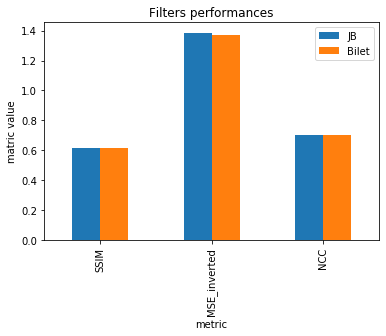

In [37]:
ax = avg_metrics_method.T.plot.bar()
ax.set_xlabel("metric")
ax.set_ylabel("matric value")
ax.set_title("Filters performances")
plt.show()

In [13]:
avg_metrics_method_up = get_avg_metrics(get_metrics_Algo_func(methods_upsample))

In the following cell, we see the performance of non-upsampling filters. The performance of **JBU** is better then the one for **Iterative**. It might be because Iterative approach is not tuned enough.

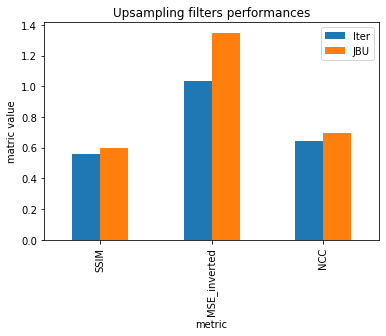

In [42]:
ax = avg_metrics_method_up.T.plot.bar()
ax.set_xlabel("metric")
ax.set_ylabel("matric value")
ax.set_title("Upsampling filters performances")
plt.show()

In the next cell, we see the execution times of non-upsampling algorithms. For some yet undefined reson, Joint Bileteral parforms faster. <br/>
As expected, the only parameter that influences execution time is window size.<br/>
 Execution time of Bileteral growth faster then the one of JB with the increase of window size.

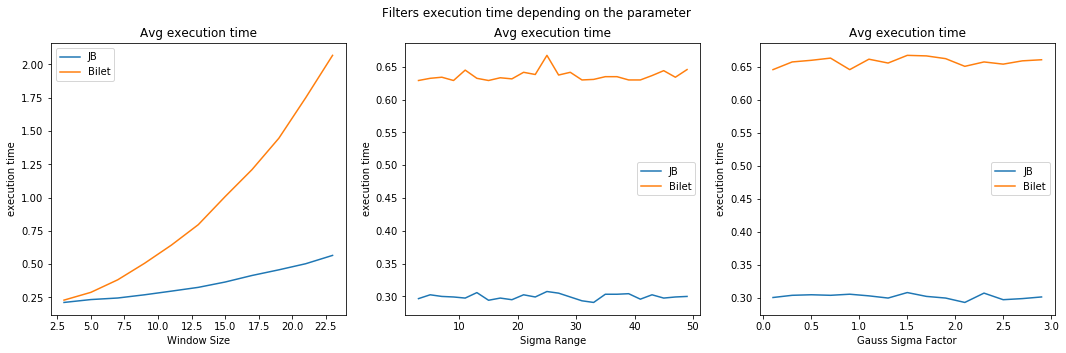

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=len(full_names), figsize=(18, 5))
plt.suptitle("Filters execution time depending on the parameter")
for i, param_name in enumerate(params.keys()):
    ax = axes[i]
    exec_times_ws = get_avg_metrics(get_time_method_param_func(param_name, methods))
    exec_times_ws.plot(ax = ax)
    ax.set_xlabel(full_names[param_name])
    ax.set_ylabel("execution time")
    ax.set_title("Avg execution time")
plt.show()

Below, we agin see that only window size infuences execution time. <br/>
Also, JBU executes slightly faster then Iterative as expected, but it is not that critical.

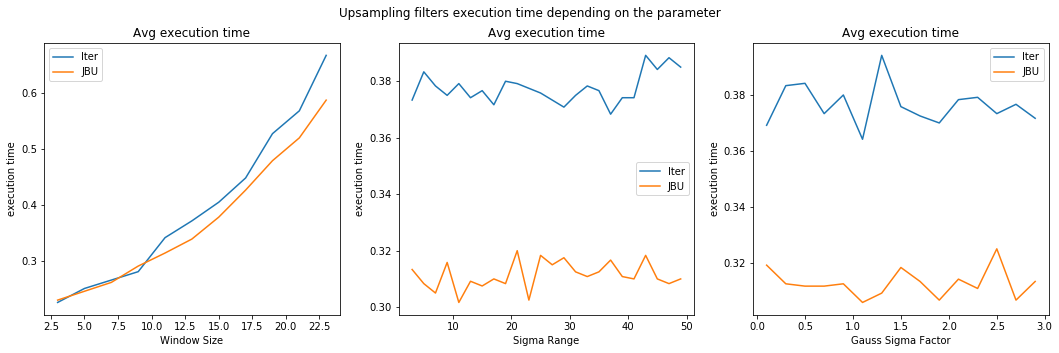

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=len(full_names), figsize=(18, 5))
plt.suptitle("Upsampling filters execution time depending on the parameter")
for i, param_name in enumerate(params.keys()):
    ax = axes[i]
    exec_times_ws = get_avg_metrics(get_time_method_param_func(param_name, methods_upsample))
    exec_times_ws.plot(ax = ax)
    ax.set_xlabel(full_names[param_name])
    ax.set_ylabel("execution time")
    ax.set_title("Avg execution time")
    # plt.show()
plt.show()

In the following cell you can see difference images for some datasets with optimal parameters for non-upsampling filters. <br/>
Visually, it is hard to spot the difference between the filters performances <br/>
Note, that the images were normalized (gt and obtained) so that they are on the same scale

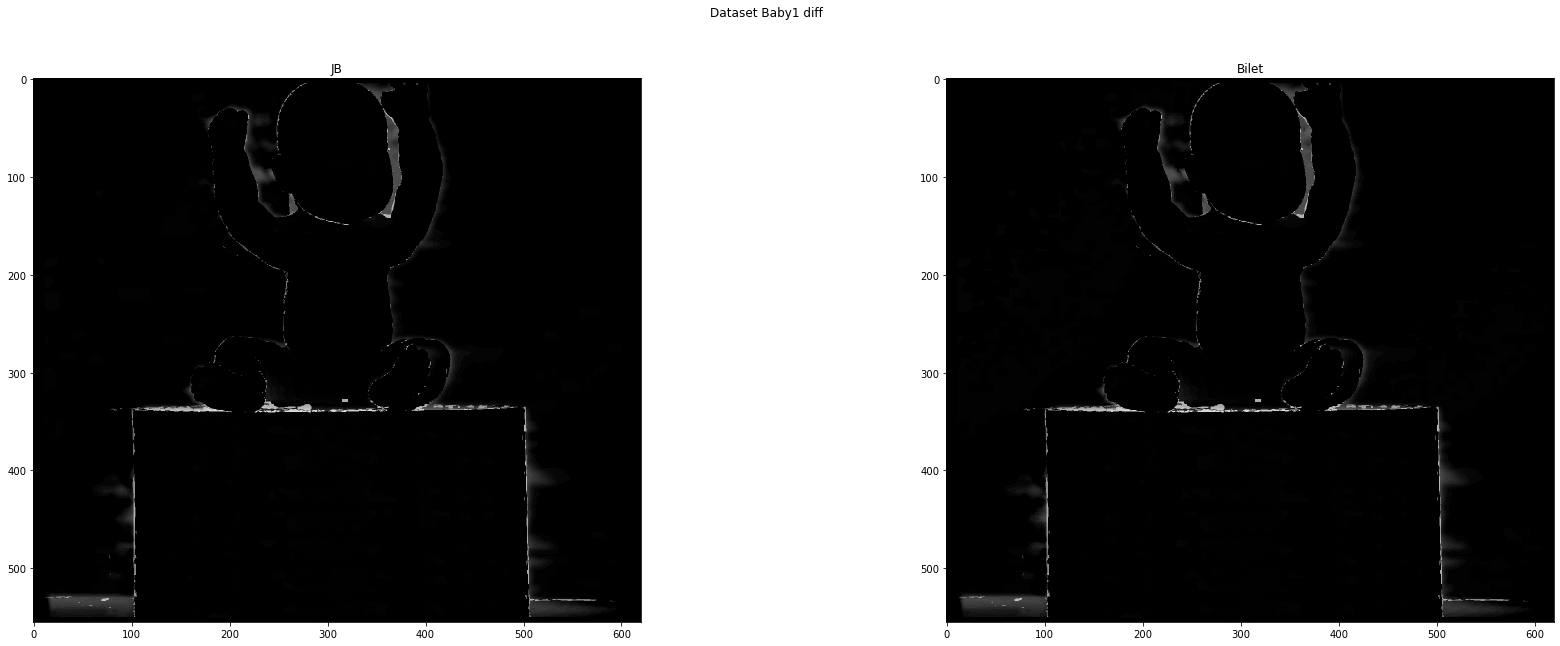

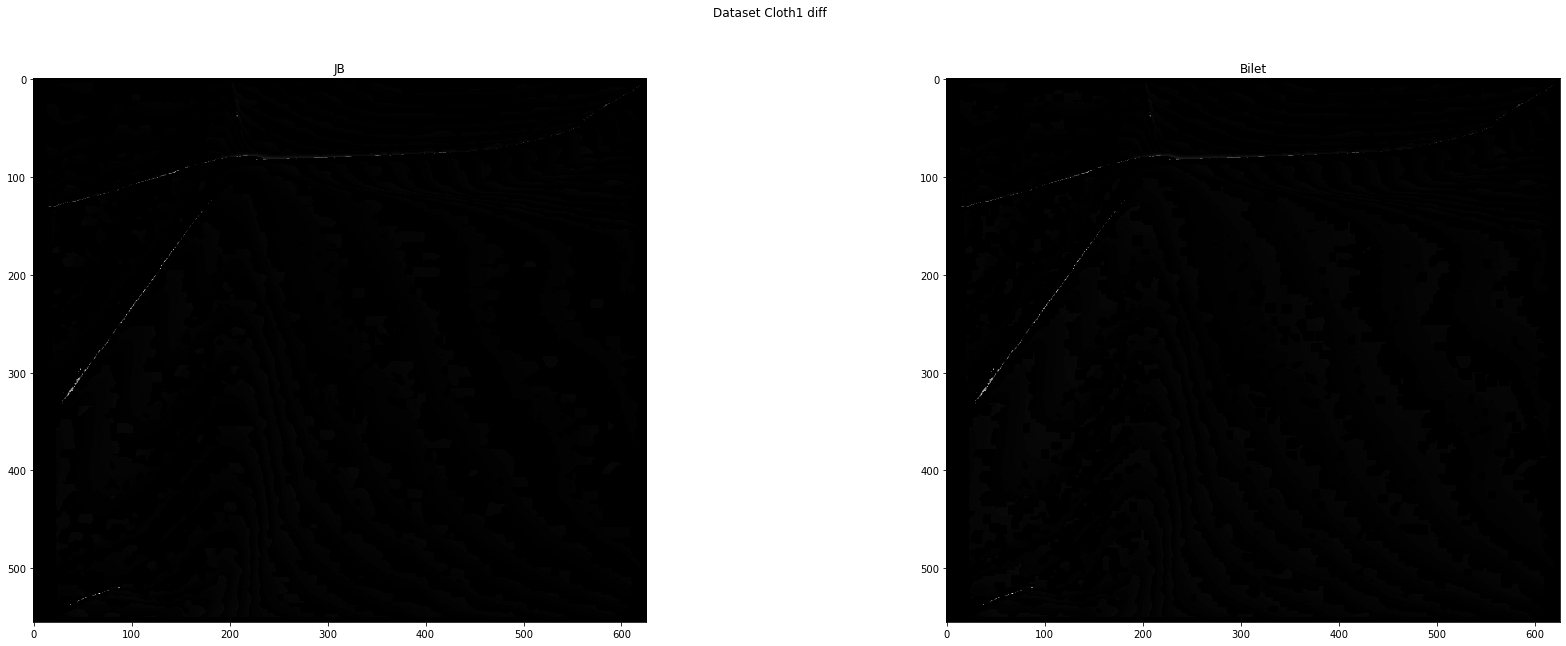

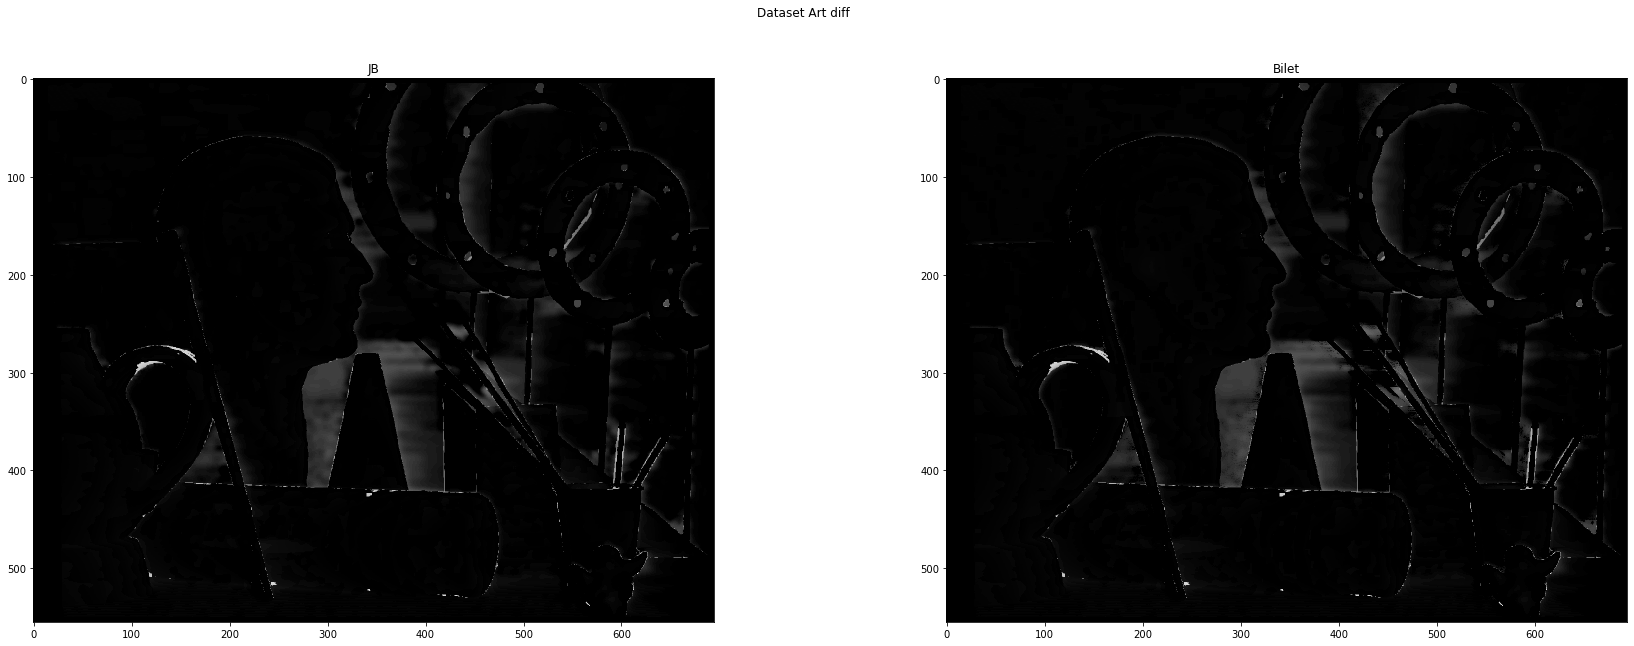

In [43]:
# diff images
for Dataset in datasets[:3]:
    display_image_diff(Dataset, methods)

In the next cell, we can see that iterative upsampling makes the edges less pixel-wise, but also blurrs out more important details.

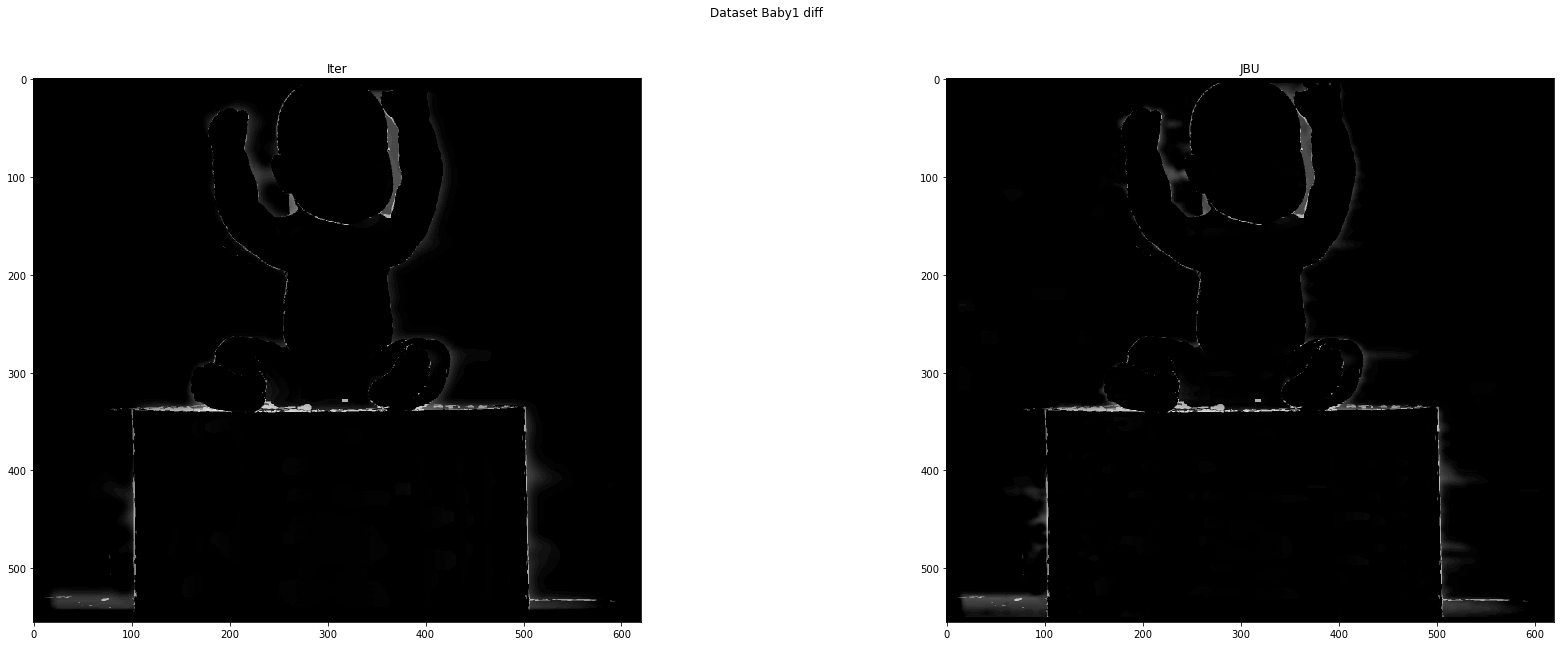

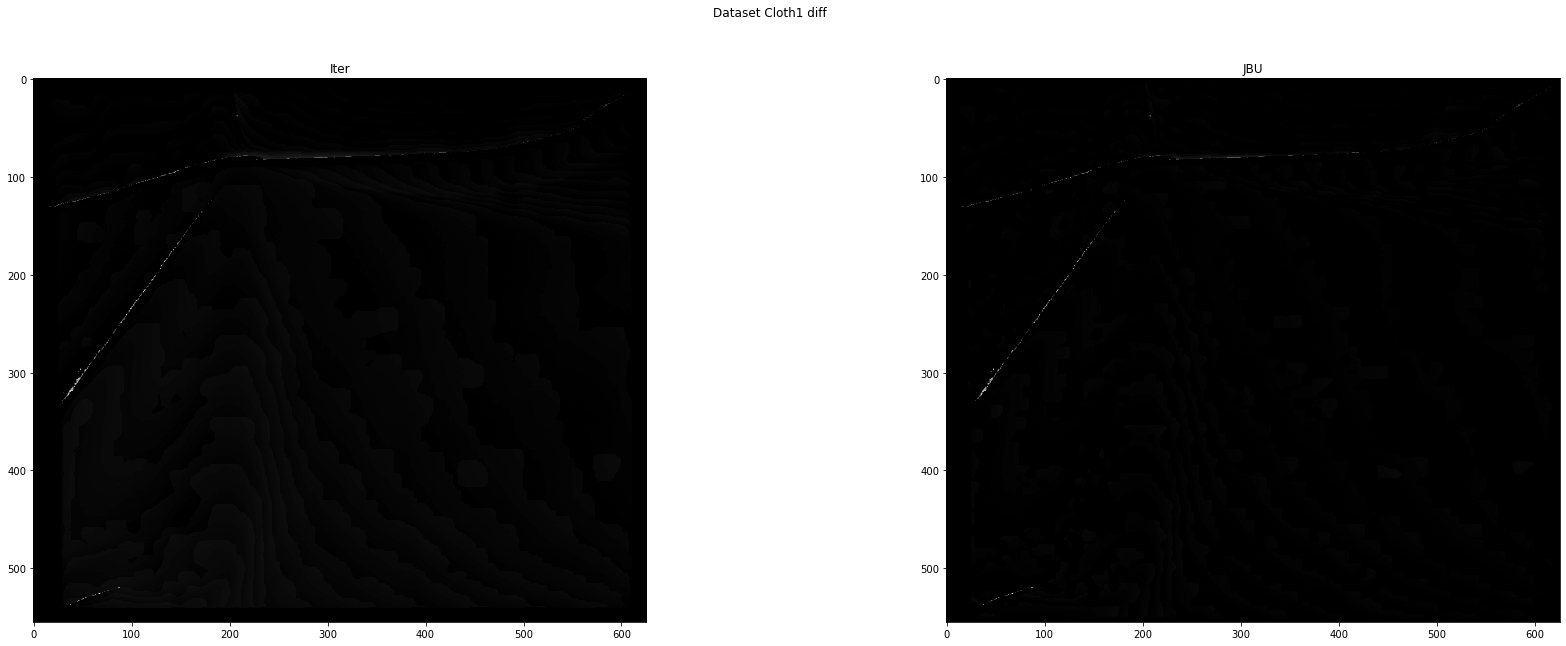

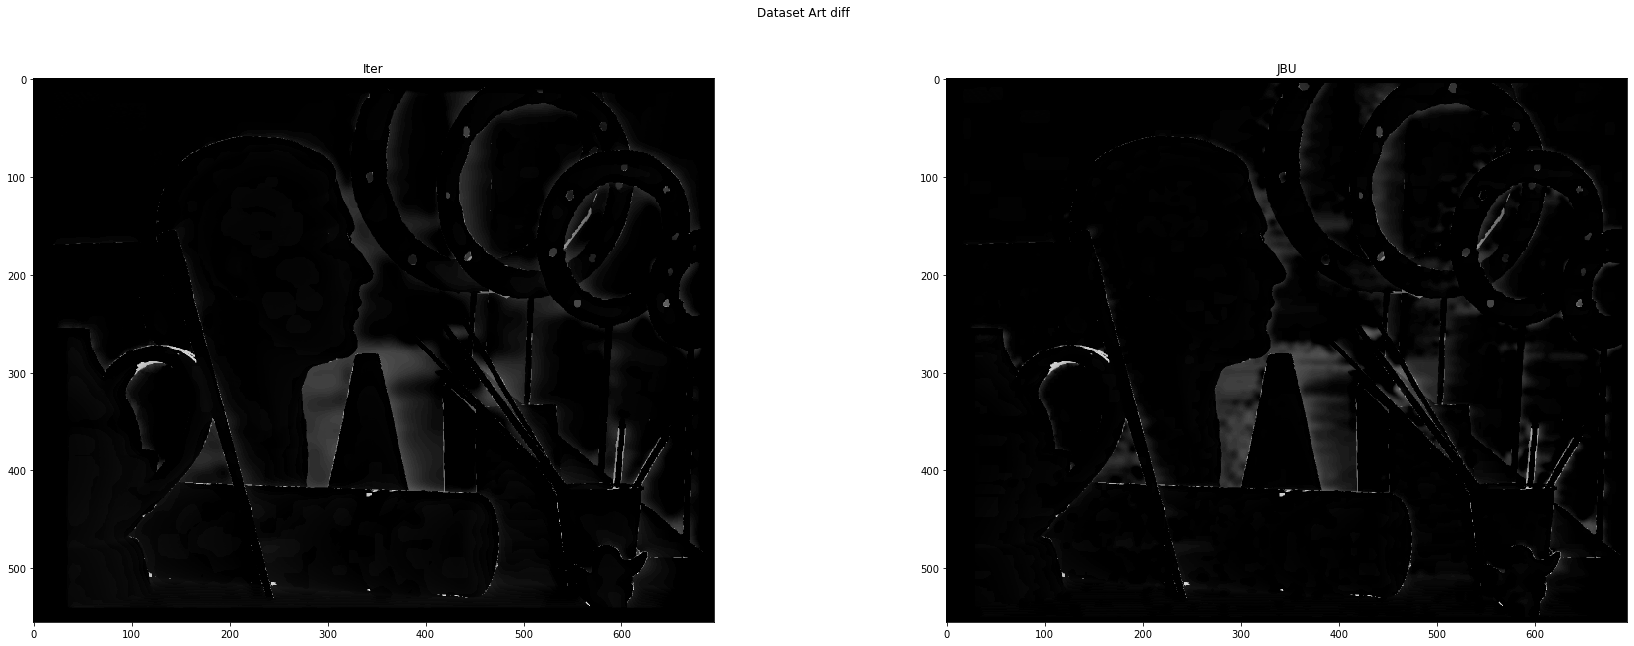

In [44]:
# diff images
for Dataset in datasets[:3]:
    display_image_diff(Dataset, methods_upsample)

And some pointclouds and normals for optimal parameters for each method: <br/>
Using `visualize_cloud.py`

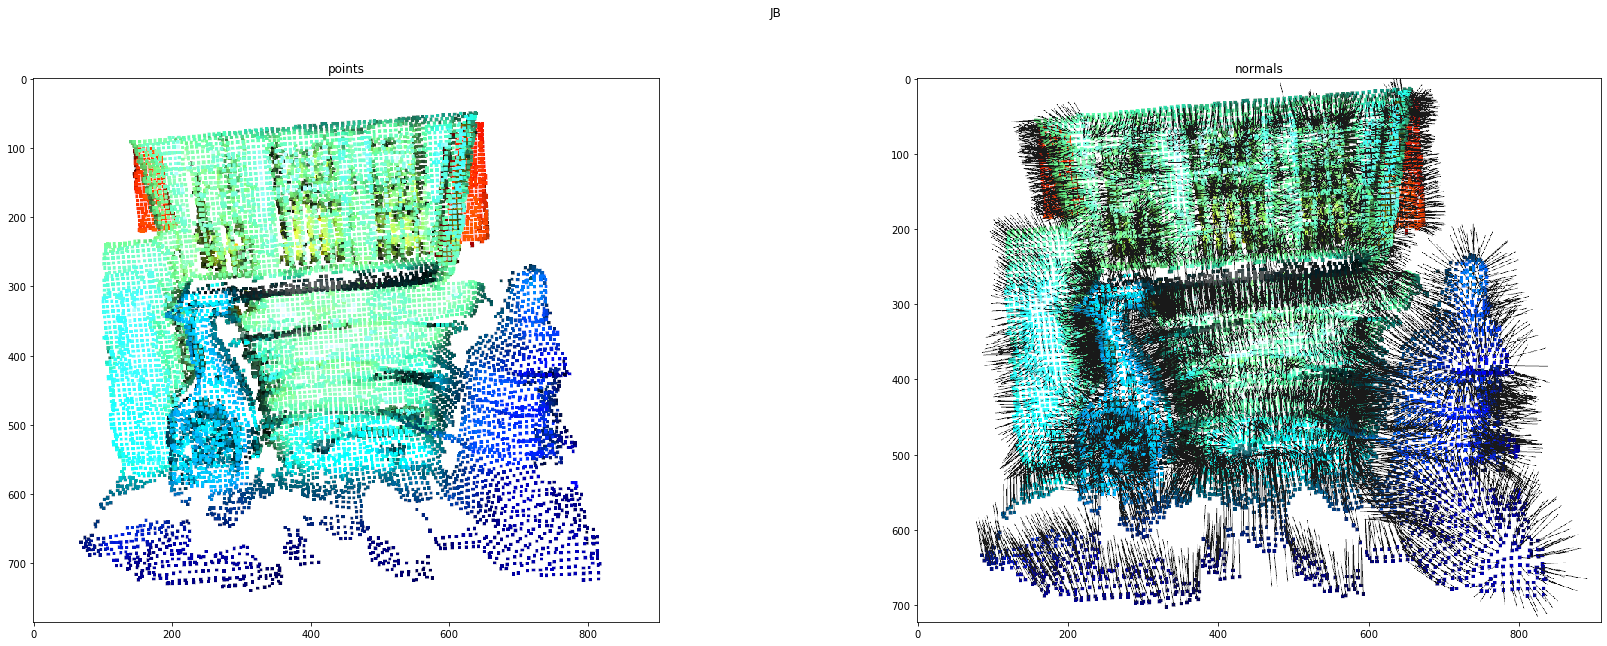

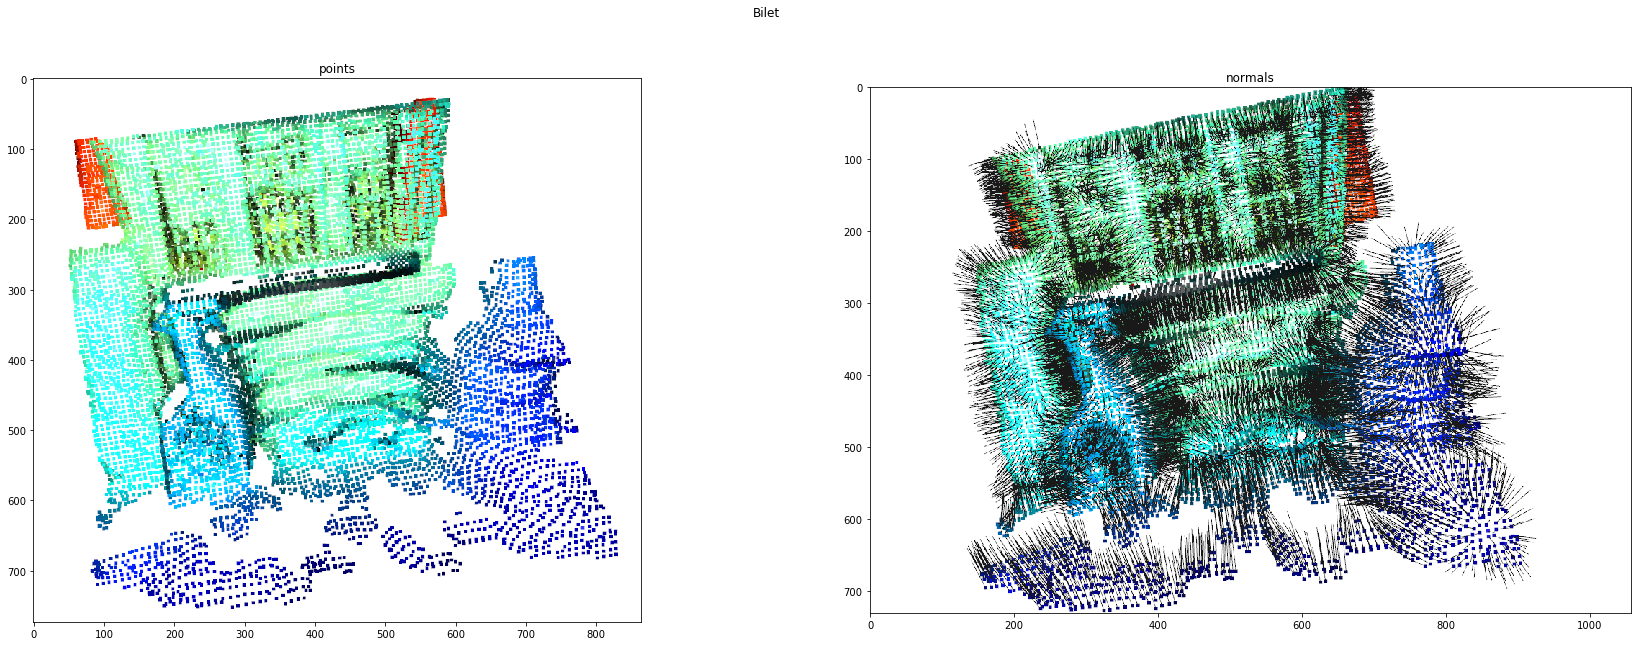

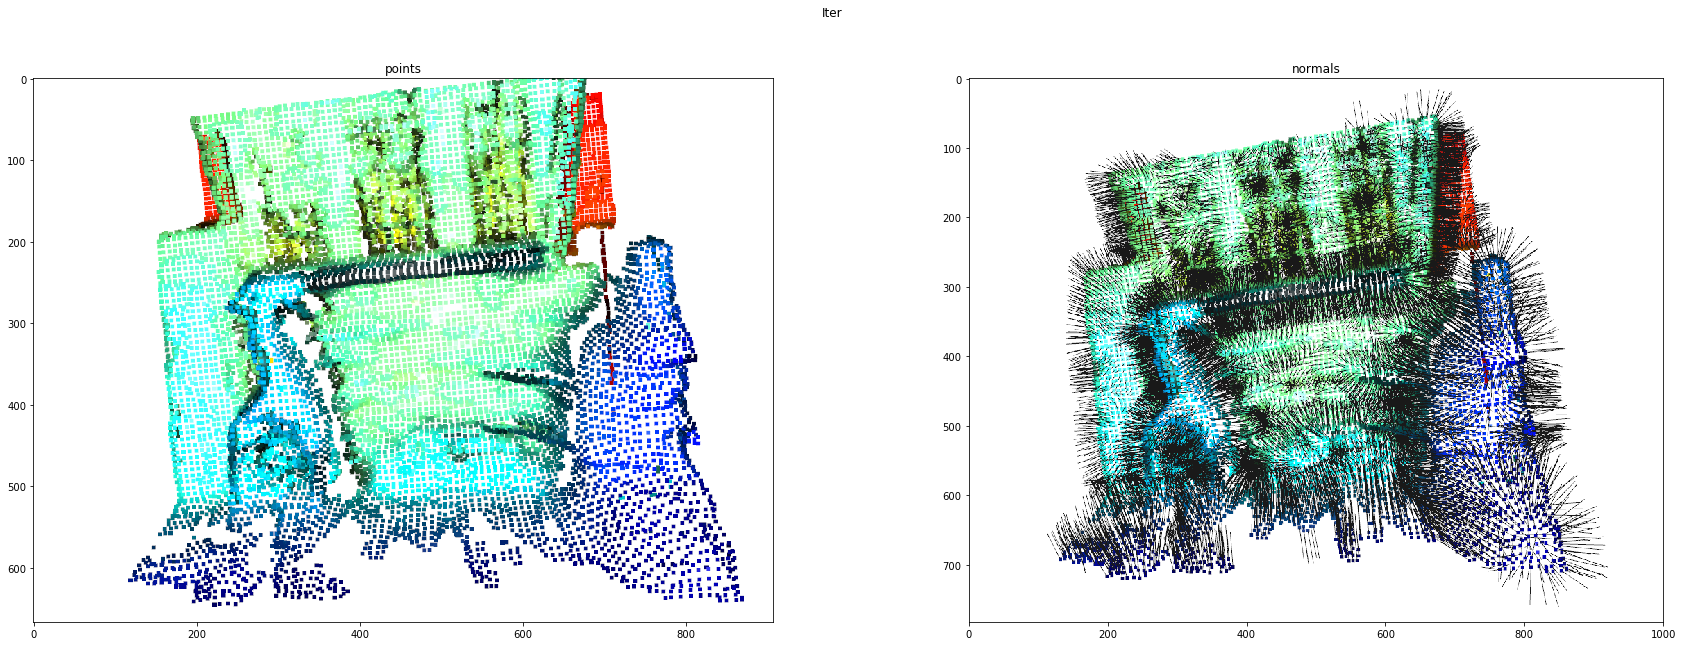

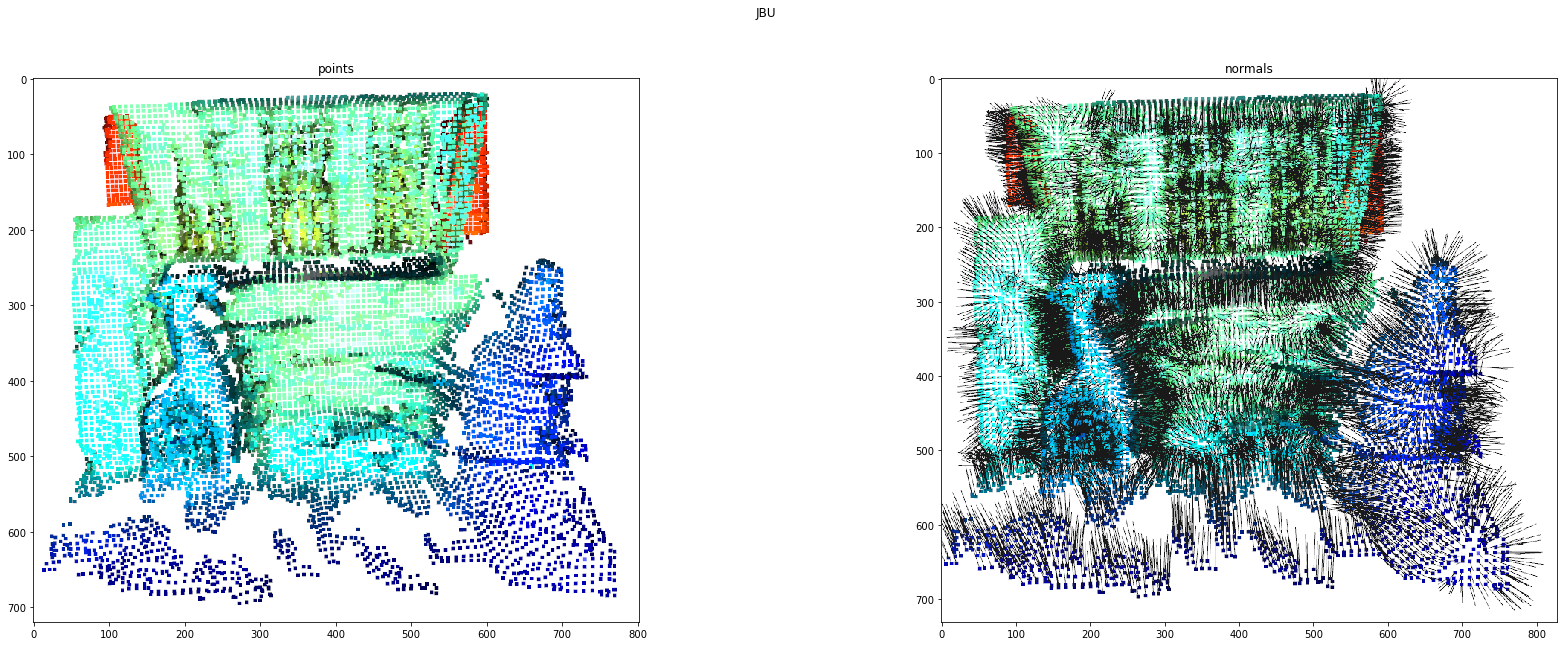

In [45]:
import matplotlib.cm
import matplotlib.pyplot as plt
vis_types = ["points", "normals"]
# cmap_reversed = matplotlib.cm.get_cmap('autumn')
for method in methods + methods_upsample:
    f, ax = plt.subplots(1, len(vis_types))
    f.set_figheight(10)
    f.set_figwidth(30)
    for i, vis_type in enumerate(vis_types):
        img_path = os.path.join("output", "3d", f"{vis_type}_{method}.png")
        img = cv2.imread(img_path, cv2.IMREAD_ANYCOLOR)
        img[:, :, :] = img[:, :, ::-1] # fixing a wierd bug
        ax[i].imshow(img)
        ax[i].set_title(vis_type)
    plt.suptitle(f"{method}")
    plt.show()

### Interactive interface

`./build/filters` by default runs with an interactive interface. Wait for the pictures, close them, and the interface would open. <br/>
You can hide any part of the program, just check the options with `./build/filters --help` <br/>
To compare visually to groundtruth, run the program without extra parameters, and you will see the images including groundtruth and intencity. <br/>

Below is the example of the interface. Depending on the methods you choose, it opens them and you could adjust parameters, and see the results after pressing **Apply** <br/>
On the picture, the parameters used for generation are specified, and also ssim versus groundtruth to get the feeling how the parameters affect the performance

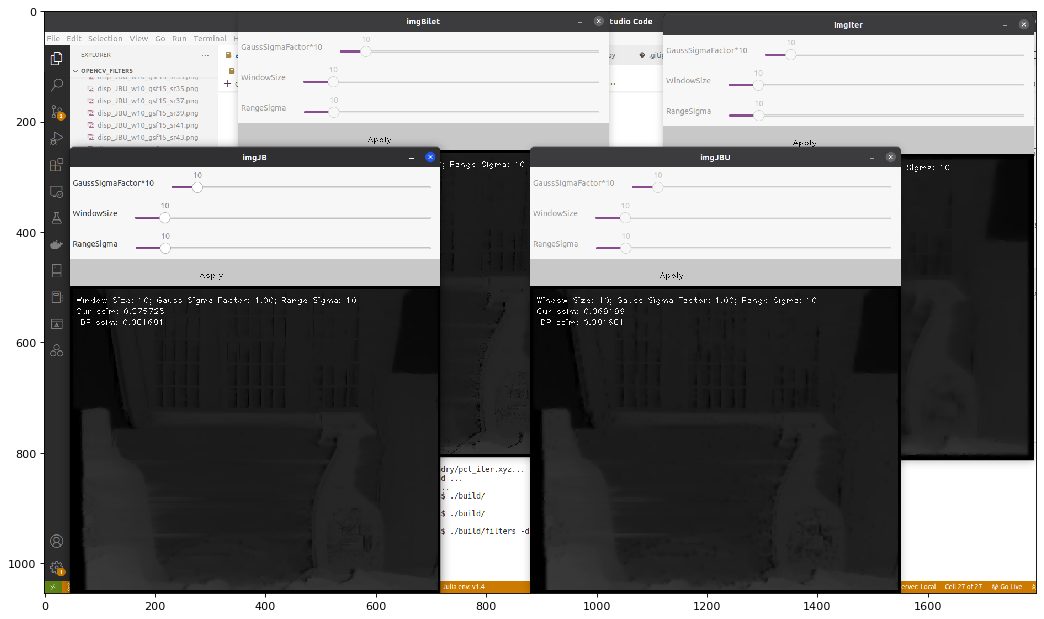

In [49]:
from matplotlib.pyplot import figure
figure(figsize=(16, 12), dpi=80)

img_gui_path = os.path.join("output", "gui.png")
img_gui = cv2.imread(img_gui_path)
plt.imshow(img_gui)
plt.show()

Here is more detailed view on one window:

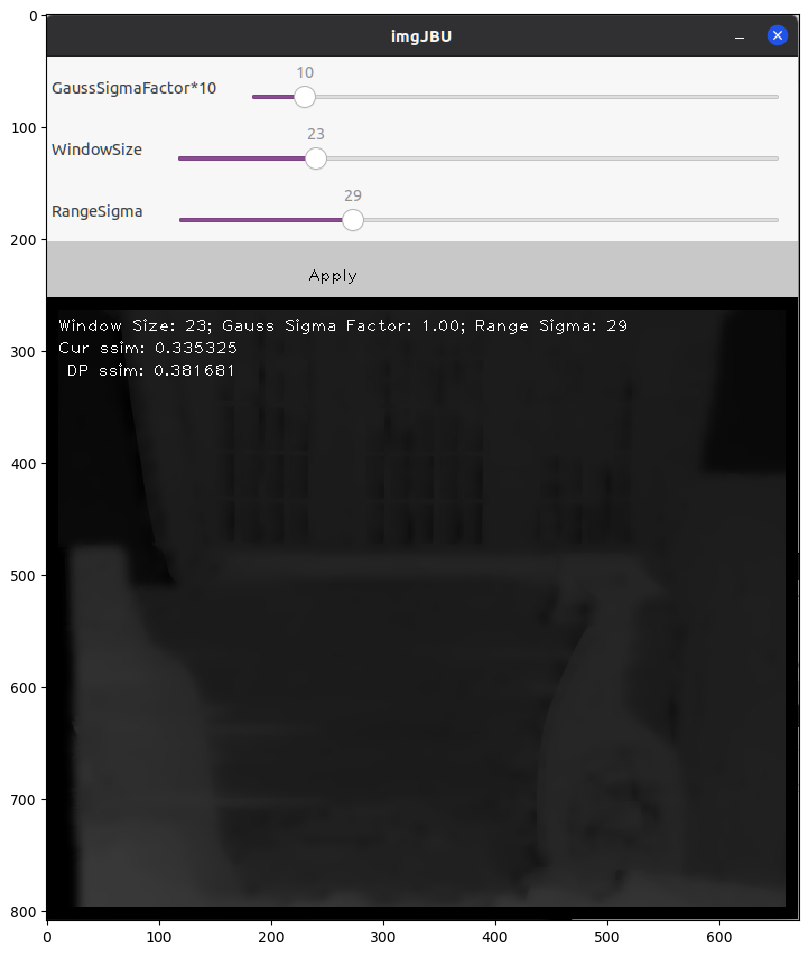

In [50]:
from matplotlib.pyplot import figure
figure(figsize=(16, 12), dpi=100)

img_gui_path = os.path.join("output", "gui_one.png")
img_gui = cv2.imread(img_gui_path)
plt.imshow(img_gui)
plt.show()

## Conclutions

 - Joint filters benefir from additional information
 - Execution time is steadily affected only by window size
 - Sigma range sould be in the middle: so that is helps with edges but does not change disparity on visual edges
 - Generally, the bigger window size, the better result is, but at some point it blurs the image too much
 - Sigma range factor helps to get rid of outliers, but could blur important details
 - Iterative approach is more promising as it helps to get rid of the pixelness. Althoug, right now performs worse. Could be that the Iterative for JBMU filter would show itself better.